In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合"

/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合


# **1.牡蠣區域辨識**

**步驟1.去除磅秤背景**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from imutils import paths #路徑檔案管理
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/111_人工智慧學程/20230620_牡蠣圖片前處理/images_更換底座(黃色底座)/正面
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面'))) #排序
imagePaths.sort(key = len) #依數字順序
imagePaths

['/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/01.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/02.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/03.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/04.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/05.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/06.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/07.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/08.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/09.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/10.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/11.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/12.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/13.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/正面/14.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重

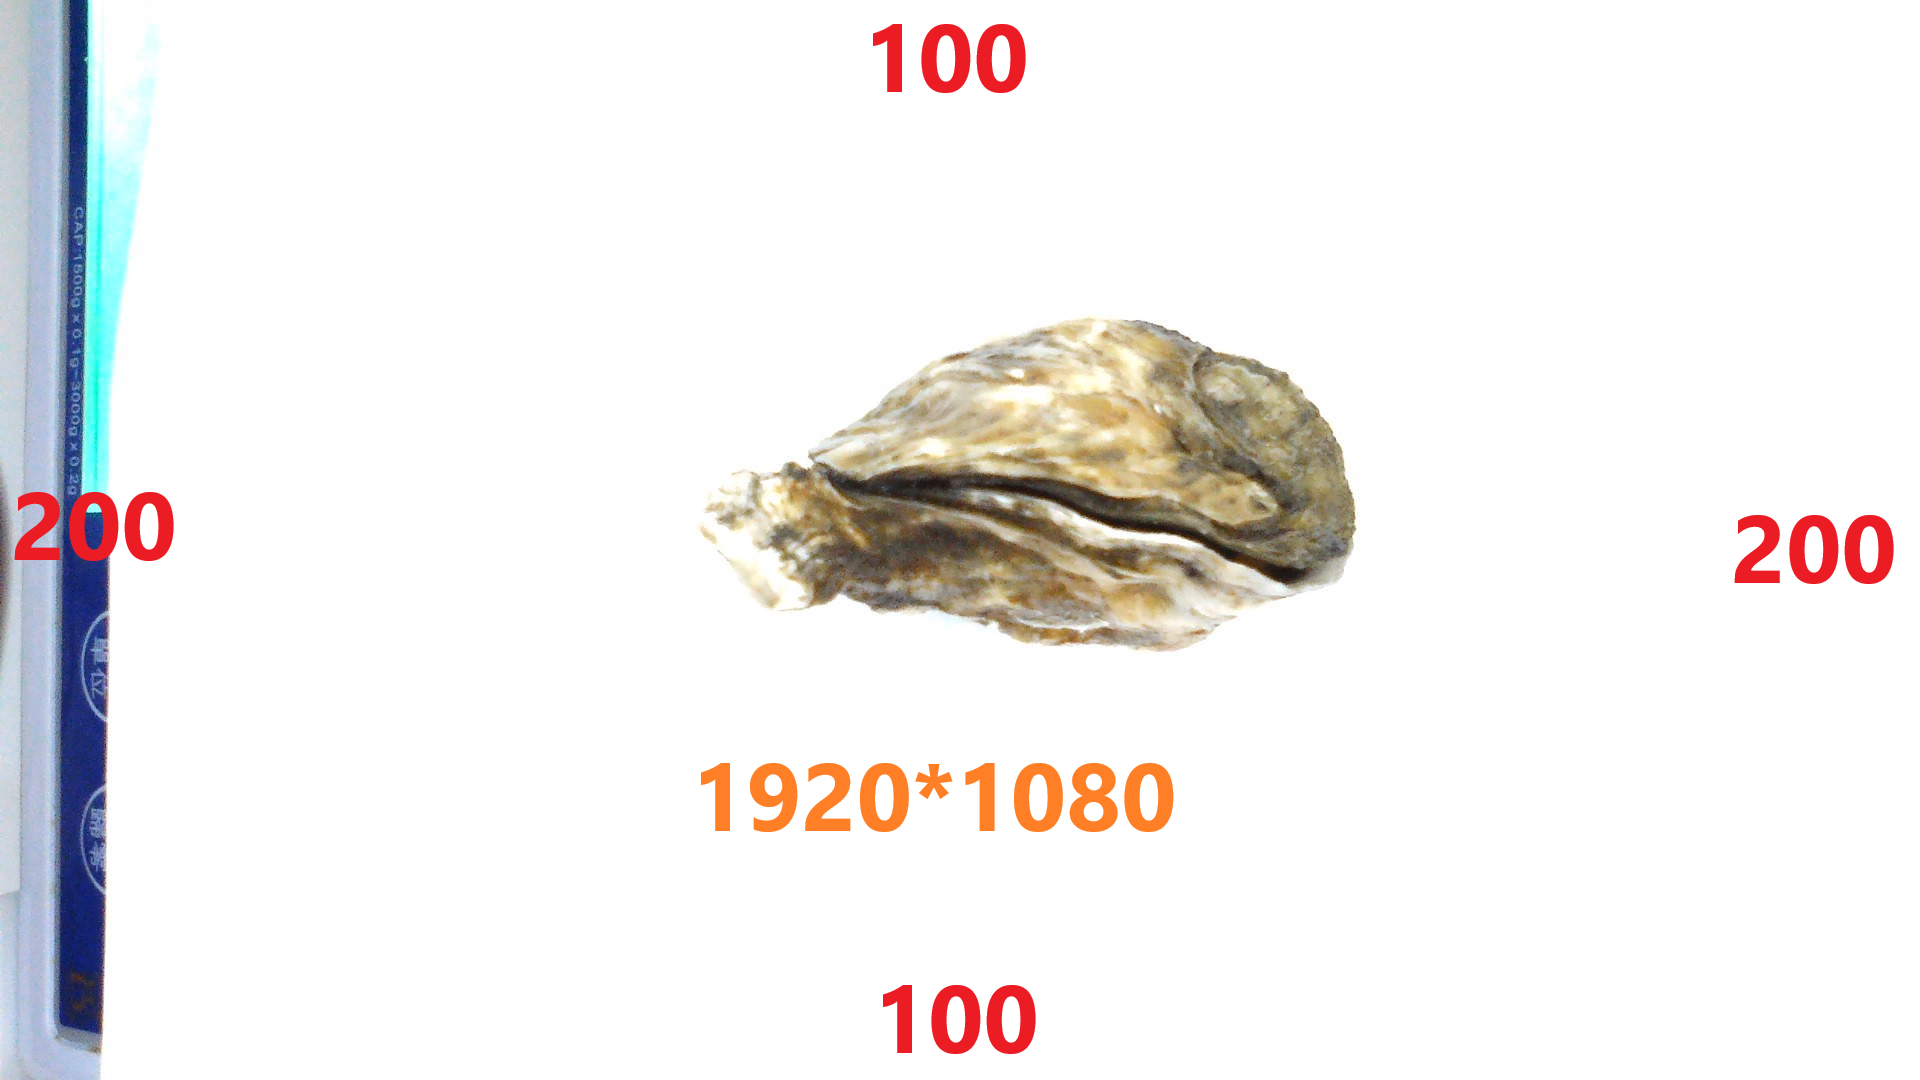

In [ ]:
for img_path in imagePaths:

  img = cv2.imread(img_path)
  x = 300
  y = 100
  w = 1420
  h = 880
  crop_img = img[y:y+h, x:x+w]        # 取出陣列的範圍(裁切圖片範圍)


  split_result = str(img_path).split('/') # 取出圖片檔名
  file_name = split_result[-1].split('.')
  print(file_name[0])
  cv2.imwrite("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/" + file_name[0] + ".png", crop_img) # 依照原圖片檔名儲存圖片
  # cv2.imshow('oxxostudio', crop_img)
  cv2_imshow(crop_img)
  # cv2.waitKey(0)                      # 按下任意鍵停止
  cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

**步驟2.K-mean顏色分群**

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/111_人工智慧學程/20230620_牡蠣圖片前處理/images_更換底座(黃色底座)/正面
imagePaths2 = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景'))) #排序
imagePaths2.sort(key = len) #依數字順序
imagePaths2

['/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/01.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/02.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/03.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/04.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/05.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/06.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/07.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/08.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/09.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/10.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/11.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/12.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景/13.png',
 '/content/d

In [ ]:

for path in imagePaths2:

  # read the image  加載圖像
  # image = cv2.imread("train/01_02.bmp")
  image = cv2.imread(path)
  #print(image)

  # convert to RGB 圖像轉換為RGB格式
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


  # 使用cv2.kmeans()函數，它以2D數組作為輸入，由於我們的原始圖像
  # 是3D（寬度、高度和深度為3 個 RGB值），我們需要將高度和寬度展平為單個像素向量（3 個 RGB值）
  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = image.reshape((-1, 3))
  # convert to float
  pixel_values = np.float32(pixel_values)

  # 打印結果像素值的形狀
  print(pixel_values.shape)

  # 當集群分配沒有發生任何變化時，K-mean分群演算法就會停止。
  # 但因為影像含有大量的數據(像素點)，所以處理會花費很多時間，當超過一些迭代次數
  # （如100）時將停止運算，或者如果集群移動小於某個 epsilon 值（
  # 在此設定為0.2），下面定義了OpenCV中的停止標準
  # define stopping criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  # 圖像中存在幾種顏色（背景為白色，
  # 牡蠣為灰色至黑色）。因此，我們將為此圖像使用2個集群
  # number of clusters (K)
  k = 2
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # 1.標籤數組是每個像素的集群標籤，它是0、1或2（因為k = 3），中心指的是中心點（每個質心的值）。
  # 2.cv2.KMEANS_RANDOM_CENTERS只是指示OpenCV最初隨機分配集群的值。
  # 3.在此不將圖像像素值轉換為浮點數；因為cv2.kmeans()需要轉換回 8 bit像素值
  # convert back to 8 bit values
  centers = np.uint8(centers)
  # flatten the labels array
  labels = labels.flatten()

  # convert all pixels to the color of the centroids 構造分割後的圖像
  segmented_image = centers[labels.flatten()]

  # 轉換回原始圖像形狀並顯示它
  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image.shape)
  # show the image
  # pp = plt.imshow(segmented_image)
  plt.show()

  pp = Image.fromarray(segmented_image) # numpy轉image

  split_result = str(path).split('/') # 取出圖片檔名
  file_name = split_result[-1].split('.')
  print(file_name[0])
  pp.save("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/" + file_name[0] + ".png" )# 依照原圖片檔名儲存圖片


(1249600, 3)
01
(1249600, 3)
02
(1249600, 3)
03
(1249600, 3)
04
(1249600, 3)
05
(1249600, 3)
06
(1249600, 3)
07
(1249600, 3)
08
(1249600, 3)
09
(1249600, 3)
10
(1249600, 3)
11
(1249600, 3)
12
(1249600, 3)
13
(1249600, 3)
14
(1249600, 3)
15
(1249600, 3)
16
(1249600, 3)
17
(1249600, 3)
18
(1249600, 3)
19
(1249600, 3)
20
(1249600, 3)
21
(1249600, 3)
22
(1249600, 3)
23
(1249600, 3)
24
(1249600, 3)
25
(1249600, 3)
26
(1249600, 3)
27
(1249600, 3)
28
(1249600, 3)
29
(1249600, 3)
30
(1249600, 3)
31
(1249600, 3)
32
(1249600, 3)
33
(1249600, 3)
34
(1249600, 3)
35
(1249600, 3)
36
(1249600, 3)
37
(1249600, 3)
38
(1249600, 3)
39
(1249600, 3)
40
(1249600, 3)
41
(1249600, 3)
42
(1249600, 3)
43
(1249600, 3)
44
(1249600, 3)
45
(1249600, 3)
46
(1249600, 3)
47
(1249600, 3)
48
(1249600, 3)
49
(1249600, 3)
50
(1249600, 3)
51
(1249600, 3)
52
(1249600, 3)
53
(1249600, 3)
54
(1249600, 3)
55
(1249600, 3)
56
(1249600, 3)
57
(1249600, 3)
58
(1249600, 3)
59
(1249600, 3)
60
(1249600, 3)
61
(1249600, 3)
62
(1249600

**步驟3.圖片二值化**

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/111_人工智慧學程/20230620_牡蠣圖片前處理/images_更換底座(黃色底座)/正面
imagePaths3 = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C'))) #排序
imagePaths3.sort(key = len) #依數字順序
imagePaths3

['/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/01.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/02.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/03.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/04.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/05.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/06.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/07.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/08.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/09.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/10.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-mean顏色分群_2C/11.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟2.1.K-m

In [ ]:

for path in imagePaths3:

  img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # 開啟圖片
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)         # 因為是 jpg，要轉換顏色為 BGRA
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        # 新增 gray 變數為轉換成灰階的圖片

  # bin_threshold = min(gray.flatten()) #二值化判斷 閾值、門檻值(threshold)
  bin_threshold = 240 #二值化判斷 閾值、門檻值(threshold)

  h = img.shape[0]     # 取得圖片高度
  w = img.shape[1]     # 取得圖片寬度

  # 依序取出圖片中每個像素
  for x in range(w):
      for y in range(h):
          if gray[y, x]> bin_threshold : # 如果該像素的灰階度大於 二值化判斷閾值 設為255(白點)
              gray[y, x] = 0
          else:
            gray[y, x] = 255
              # 如果該像素的灰階度大於 200，調整該像素的透明度
              # 使用 255 - gray[y, x] 可以將一些邊緣的像素變成半透明，避免太過鋸齒的邊緣


  # cv2_imshow(gray)

  split_result = str(path).split('/') # 取出圖片檔名
  file_name = split_result[-1].split('.')
  print(file_name[0])
  cv2.imwrite("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟3.圖片二值化/" + file_name[0] + ".png", gray)    # 依照原圖片檔名儲存圖片，存檔儲存為 png
  cv2.waitKey(0)                        # 按下任意鍵停止
  cv2.destroyAllWindows()


01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


**步驟4.畫矩形框出蚵仔邊緣**

In [ ]:
img11 = cv2.imread("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟3.圖片二值化/01.png",cv2.IMREAD_GRAYSCALE) #以灰階模式讀取之前轉換好的二值化圖像

In [ ]:
len(img[0])

1420

In [ ]:
len(img)

880

In [ ]:
def draw_coordinates(img): #在蚵仔邊緣畫矩形的四座標

  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE) #以灰階模式讀取之前轉換好的二值化圖像

  #依列讀取每行像素植，算出平均值並正規化與0~1之間
  r = [] #儲存每一列正規化值
  for i in range(len(img)):
    add = 0
    for j in range(len(img[i])):
      p=img[i][j]
      p=p/255 #像素值/255正規化
      add = add+p #同行正規化像素值相加

    add = add/len(img[i]) #同行正規化像素值全相加後/len(img[i])(整行像素點個數)再正規化一次
    r.append(add) #存入每一行的像素值總和正規化值

    # print(add)

  # 設雜訊門檻值 : 依據每一行的像素值總和正規化值(黑白點比例)去除雜訊
  r_index = [] #儲存大於雜訊門檻值的行數index
  for ii in range(len(r)):
    if r[ii] >= 0.01: #雜訊門檻值設0.01
      r_index.append(ii) #如當列像素值總和正規化值大於雜訊門檻值存入r_index

  # r_index

  c = []
  # for k in range(len(img)):
  for L in range(len(img[0])):
    add = 0
    for m in range(len(img)):
      p=img[m][L]
      p=p/255
      add = add+p

    add = add/len(img)
    c.append(add)

    # print(add)

  c_index = []
  for jj in range(len(c)):
    if c[jj] >= 0.01:
      c_index.append(jj)

  # c_index

  return min(c_index),min(r_index),max(c_index),max(r_index)

In [ ]:
def draw_rectangle(Path2,x1,y1,x2,y2): #在蚵仔邊緣畫矩形

    # image = cv2.imread(Path)  #讀二質化圖辨識範圍
    image2 = cv2.imread(Path2) #讀原圖畫矩形

    # 畫矩形
    left_up = (x1, y1)
    right_down =  (x2, y2)
    color = (0, 0, 255) # red
    thickness = 2 # 寬度 (-1 表示填滿)
    cv2.rectangle(image2, left_up, right_down, color, thickness)

    # cv2.imwrite('draw_rectangle.jpg', image2)

    # cv2_imshow(image2) #顯示圖片

    return image2

    n = n+1

In [ ]:
imagePaths4_1 = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟3.圖片二值化'))) #排序
imagePaths4_1.sort(key = len) #依數字順序
imagePaths4_2 = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟1_去除磅秤背景'))) #排序
imagePaths4_2.sort(key = len) #依數字順序

In [ ]:
for n in range(len(imagePaths4_2)):
  aaa = draw_coordinates(imagePaths4_1[n]) #讀二質化圖辨識範圍
  bbb = draw_rectangle(imagePaths4_2[n],aaa[0],aaa[1],aaa[2],aaa[3]) #讀原圖畫矩形


  split_result = str(imagePaths4_1[n]).split('/') # 取出圖片檔名
  file_name = split_result[-1].split('.')
  print(file_name[0])
  cv2.imwrite("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟4.畫矩形框出蚵仔邊緣/" + file_name[0] + ".png", bbb)# 依照原圖片檔名儲存圖片，存檔儲存為 png

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


In [ ]:
def cut_rectangle(Path2,x1,y1,x2,y2): #將圖片依蚵仔邊緣剪下

    # image = cv2.imread(Path)  #讀二質化圖辨識範圍
    image2 = cv2.imread(Path2) #讀原圖畫矩形

    cut_img = image2[y1:y2,x1:x2]

    # cv2_imshow(cut_img) #顯示圖像

    return cut_img

    n = n+1

In [ ]:
for n in range(len(imagePaths4_2)):
  aaa = draw_coordinates(imagePaths4_1[n]) #讀二質化圖辨識範圍
  bbb = cut_rectangle(imagePaths4_2[n],aaa[0],aaa[1],aaa[2],aaa[3]) #將圖片依蚵仔邊緣剪下

  split_result = str(imagePaths4_1[n]).split('/') # 取出圖片檔名
  file_name = split_result[-1].split('.')
  print(file_name[0])
  cv2.imwrite("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/" + file_name[0] + ".png", bbb) # 依照原圖片檔名儲存圖片，存檔儲存為 png

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


尺寸不動，統一大小1200*1200

In [ ]:
def scale(img, long_size,short_size):
    h, w = img.shape[0:2]

    a = short_size - h
    b = long_size - w

    if a > 0:
        img = np.pad(img,((0,a),(0,0),(0,0)),"constant",constant_values=255)
    if b> 0:
        img = np.pad(img, ((0, 0), (0, b), (0, 0)), "constant", constant_values=255)
    h2, w2 = img.shape[0:2]
    scale = short_size * 1.0 / h2
    scale2 = long_size*1.0/w2
    img = cv2.resize(img, dsize=None, fx=scale2, fy=scale)
    print(img.shape)
    return img

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/111_人工智慧學程/20230422_圖片皮膚區域檢測/foot
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下'))) #排序
imagePaths.sort(key = len) #依數字順序

In [ ]:
imagePaths

['/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/01.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/02.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/03.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/04.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/05.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/06.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/07.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/08.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/09.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/10.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/11.png',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟5.將圖片依蚵仔邊緣剪下/12.png',
 '/content/drive/MyDrive/111_人工智慧學程/2024

In [ ]:
len(imagePaths)

130

In [ ]:
for i in range(len(imagePaths)):

  img = cv2.imread(imagePaths[i])   # 開啟圖片

  img2 = scale(img,1200,1200)

  # cv2_imshow(img2)#顯示影像

  cv2.imwrite('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/' + str(i+1) + '.jpg', img2)

  print(i)

(1200, 1200, 3)
0
(1200, 1200, 3)
1
(1200, 1200, 3)
2
(1200, 1200, 3)
3
(1200, 1200, 3)
4
(1200, 1200, 3)
5
(1200, 1200, 3)
6
(1200, 1200, 3)
7
(1200, 1200, 3)
8
(1200, 1200, 3)
9
(1200, 1200, 3)
10
(1200, 1200, 3)
11
(1200, 1200, 3)
12
(1200, 1200, 3)
13
(1200, 1200, 3)
14
(1200, 1200, 3)
15
(1200, 1200, 3)
16
(1200, 1200, 3)
17
(1200, 1200, 3)
18
(1200, 1200, 3)
19
(1200, 1200, 3)
20
(1200, 1200, 3)
21
(1200, 1200, 3)
22
(1200, 1200, 3)
23
(1200, 1200, 3)
24
(1200, 1200, 3)
25
(1200, 1200, 3)
26
(1200, 1200, 3)
27
(1200, 1200, 3)
28
(1200, 1200, 3)
29
(1200, 1200, 3)
30
(1200, 1200, 3)
31
(1200, 1200, 3)
32
(1200, 1200, 3)
33
(1200, 1200, 3)
34
(1200, 1200, 3)
35
(1200, 1200, 3)
36
(1200, 1200, 3)
37
(1200, 1200, 3)
38
(1200, 1200, 3)
39
(1200, 1200, 3)
40
(1200, 1200, 3)
41
(1200, 1200, 3)
42
(1200, 1200, 3)
43
(1200, 1200, 3)
44
(1200, 1200, 3)
45
(1200, 1200, 3)
46
(1200, 1200, 3)
47
(1200, 1200, 3)
48
(1200, 1200, 3)
49
(1200, 1200, 3)
50
(1200, 1200, 3)
51
(1200, 1200, 3)
52
(12

調整圖片為400*400

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/111_人工智慧學程/20230422_圖片皮膚區域檢測/foot
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200'))) #排序
imagePaths.sort(key = len) #依數字順序

In [ ]:
imagePaths

['/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/1.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/2.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/3.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/4.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/5.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/6.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/7.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/8.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/9.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/10.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟6.尺寸不動，統一大小1200*1200/11.jpg',
 '/content/drive/MyDrive/111_人工智慧學程/20240

In [ ]:
len(imagePaths)

130

In [ ]:
for i in range(len(imagePaths)):

  img = cv2.imread(imagePaths[i])   # 開啟圖片

  img2 = cv2.resize(img, (400, 400), interpolation=cv2.INTER_AREA)

  cv2_imshow(img2)

  print(i)

  cv2.imwrite('/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟7.調整大小為400*400/' + str(i+1) + '.jpg', img2)

Output hidden; open in https://colab.research.google.com to view.

# **2.單一牡蠣偵測**

In [ ]:
img = cv2.imread("/content/drive/MyDrive/111_人工智慧學程/20240122_牡蠣重量辨識系統整合/步驟7.調整大小為400*400/1.jpg")

In [ ]:
img

array([[[255, 255, 254],
        [253, 254, 252],
        [251, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 253],
        [255, 255, 254],
        [248, 253, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [248, 250, 250],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
print('================請輸入牡蠣基本數據================')
Total_weight = input('總重量 ：')
Length = input('殼長度 ：')
Width = input('殼寬度 ：')
Height = input('殼高度 ：')
print('==================================================')

print('><><><><><><><><><><><><><><><><><><><><><><><><><')

print('===============您輸入的牡蠣基本數據===============')
print('總重量 ：'+Total_weight)
print('殼長度 ：'+Length)
print('殼寬度 ：'+Width)
print('殼高度 ：'+Height)
print('==================================================')

================請輸入牡蠣基本數據================
總重量 ：28.1
殼長度 ：7.8
殼寬度 ：4.1
殼高度 ：2.5
><><><><><><><><><><><><><><><><><><><><><><><><><
===============您輸入的牡蠣基本數據===============
總重量 ：28.1
殼長度 ：7.8
殼寬度 ：4.1
殼高度 ：2.5


In [ ]:
Total_weight = float(Total_weight)
Length = float(Length)
Width = float(Width)
Height = float(Height)

In [ ]:
count1 = 0
for count1 in range(len(img)):
  img[count1][-1][:] = Total_weight
  count1 = count1 + 1

count2 = 0
for count2 in range(len(img)):
  img[count2][-4][:] = Length
  count2 = count2 + 1

count3 = 0
for count3 in range(len(img)):
  img[count3][-3][:] = Width
  count3 = count3 + 1

count4 = 0
for count4 in range(len(img)):
  img[count4][-2][:] = Height
  count4 = count4 + 1

直接weight[img_index]，無錯

In [ ]:
img[0][-4]

array([7, 7, 7], dtype=uint8)

In [ ]:
img[0][-3]

array([4, 4, 4], dtype=uint8)

In [ ]:
img[0][-2]

array([2, 2, 2], dtype=uint8)

In [ ]:
img[0][-1]

array([28, 28, 28], dtype=uint8)

In [ ]:
img[400][-1]

IndexError: index 400 is out of bounds for axis 0 with size 400

In [ ]:
img[399][-1]

array([28, 28, 28], dtype=uint8)

In [ ]:
img[0][-1]

array([28, 28, 28], dtype=uint8)

============================================================

In [ ]:
img

array([[[255, 255, 254],
        [253, 254, 252],
        [251, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 254, 253],
        [255, 255, 254],
        [248, 253, 252],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [248, 250, 250],
        [253, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]]

In [ ]:
x = np.array(img)

In [ ]:
x

array([[[255, 255, 254],
        [253, 254, 252],
        [251, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 254, 253],
        [255, 255, 254],
        [248, 253, 252],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [248, 250, 250],
        [253, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]]

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(400, 400, 3)

In [ ]:
x.shape[0]

400

In [ ]:
x.shape[1]

400

In [ ]:
x.shape[2]

3

In [ ]:
x.shape[3]

IndexError: tuple index out of range

In [ ]:
x

array([[[255, 255, 254],
        [253, 254, 252],
        [251, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 254, 253],
        [255, 255, 254],
        [248, 253, 252],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [248, 250, 250],
        [253, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]]

In [ ]:
xx = x.reshape(1, 400, 400, 3)

In [ ]:
x

array([[[255, 255, 254],
        [253, 254, 252],
        [251, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 254, 253],
        [255, 255, 254],
        [248, 253, 252],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [248, 250, 250],
        [253, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [ 28,  28,  28]]

In [ ]:
xx

array([[[[255, 255, 254],
         [253, 254, 252],
         [251, 255, 255],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [ 28,  28,  28]],

        [[255, 254, 253],
         [255, 255, 254],
         [248, 253, 252],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [ 28,  28,  28]],

        [[255, 255, 255],
         [248, 250, 250],
         [253, 255, 255],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [ 28,  28,  28]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [ 28,  28,  28]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  4,   4,   4],
         [  2,   2,   2],
         [ 28,  28,  28]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  4,   4,   4],
        

In [ ]:
x_test = xx
# y_test = y

In [ ]:
# keras是深度學習框架(工具、API)，支援tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model       #模型工具
from tensorflow.keras.models import Sequential  #顺序模型
from tensorflow.keras.experimental import LinearModel
from tensorflow.keras.layers import Dense       #全連接層
from tensorflow.keras import backend            #後端模組

import keras
# from keras.preprocessing.image import load_img #載入img
# from keras.preprocessing.image import img_to_array #img轉矩陣
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
#Conv2D卷積層, MaxPooling2D池化層, Flatten平坦層
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

In [ ]:
# 1.整數轉浮點數
# x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 2.直接除以最大值，標準化成0~1浮點數
# x_train /= 255
x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#(總數據筆數60000, 寬28, 高28, 通道1) 灰階
#重要的是影像完整被送進模型(28,28,1) MLP(784)

1 test samples


In [ ]:
from keras.models import load_model #載入模型

In [ ]:
model = load_model("/content/drive/MyDrive/111_人工智慧學程/20231217_牡蠣圖庫4彩色+label關係強特徵模型建立/20231219_O4_Color_Feature4_CNN_e1000.h5")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 2s 2s/step


array([[7.728138]], dtype=float32)

In [ ]:
y_pred[0]

array([7.728138], dtype=float32)

In [ ]:
y_pred[0][0]

7.728138

In [ ]:
print("此顆牡蠣的預測重量為 : ", y_pred[0][0]," 公克(g)")

此顆牡蠣的預測重量為 :  7.728138  公克(g)
